<div style="background-color: orange">
    <center> <h1> Project 1 Phase 2 </h1> </center>
    <center> <h1> Hassan Zeidan </h1> </center>
</div>

## This is the Second phase of Programming for Applied AI Project

##### In Phase 1 of the project, You have downloaded the Diabetes Prediction dataset and were able to explore and extract statistical information out of it. In phase 2, we continue exploring the dataset through visualization and performing the necessary pre-processing. We are also going to build a machine learning solution for this dataset.

##### Don't worry about the Machine Learning aspect of Phase 2. You will be able to work on it after finishing the content of Week 8, where we will learn how to build our first machine learning solution. This part of Phase 2 only includes visualization and pre-processing exercises.

##### The dataset can be downloaded from the Project Description Page.

##### <span style="color:gray">Hint: Make sure to review this week's course content before working on this project, as the questions presented here are covered in this and previous weeks.</span>

##### <span style="color:orange"><i>Disclaimer: This project is designed exclusively for the course and should not be used for real medical purposes. AI can make errors and the medical field is highly sensitive. Thus, designing such an application in practice requires a solid knowledge of the medical and AI fields combined.</i></span>

## Fill in the empty cells to answer the questions. You can add more cells if needed.
## <span style="color:green">Some questions have dedicated spots for your comments. Make sure to answer them as well.</span>

### Make sure to import the needed libraries by running this cell below. 

In [26]:
# importing libraries :-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset using Pandas and store it in a variable.

<div style="background-color: orange">
    <center> <h3> Part 1 </h3> </center>
    <center> <h3> Visualization and Cleaning </h3> </center>
</div>

#### We will be using this dataframe to perform the visualization and data cleaning

## <span style="color:red">Question 1</span>
### Plot a histogram showing the distribution for the following features present in the dataset: gender, age, hypertension, heart\_disease, smoking\_history, HbA1c\_level, and diabetes.

##### hint: use sns.countplot

In [27]:
df=pd.read_csv('/Users/hassanzeidan/Desktop/Jupyter/Project phase 2/diabetes_prediction_dataset.csv')
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


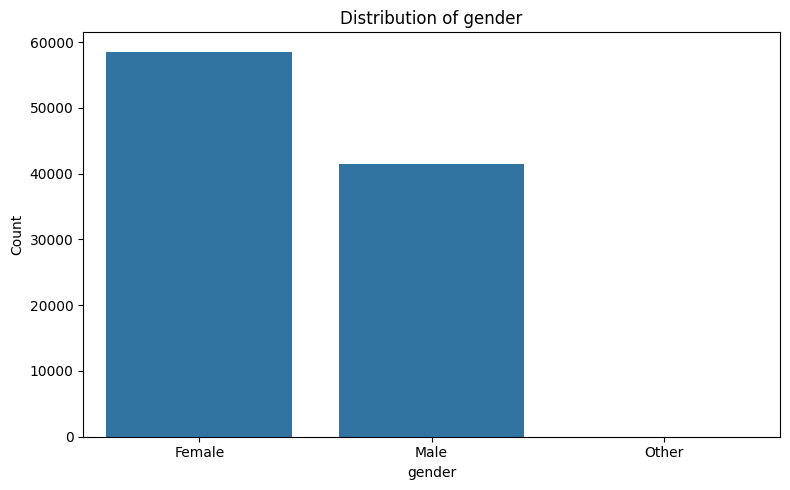

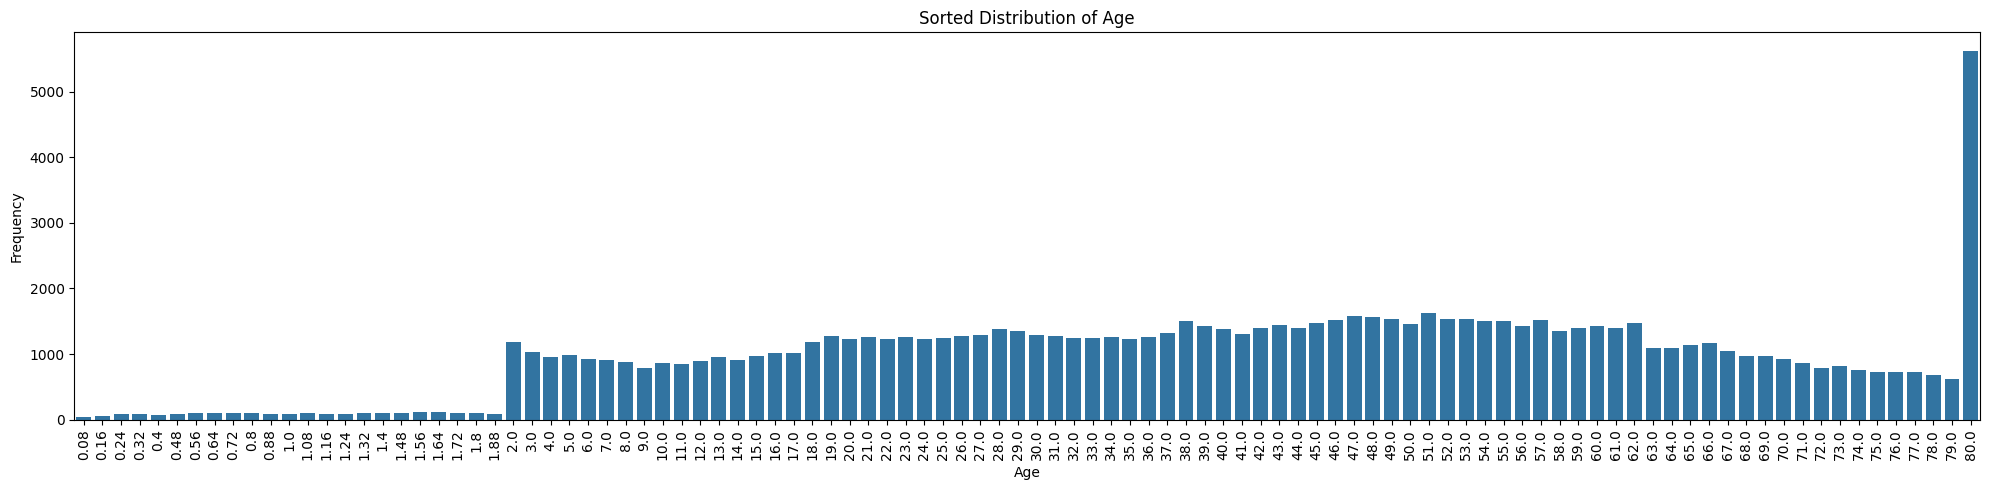

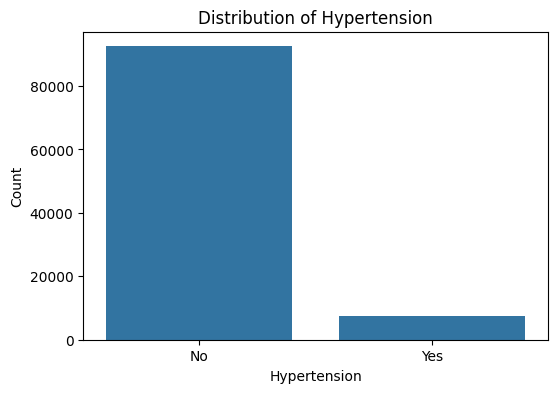

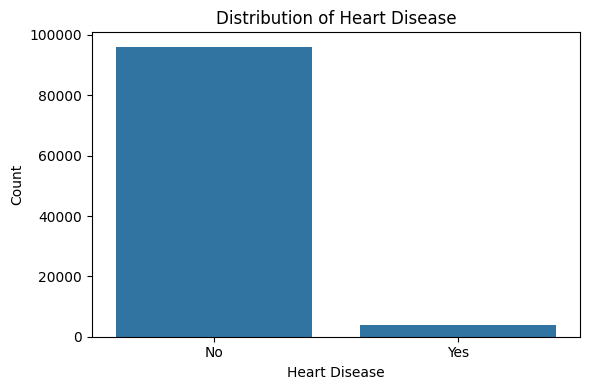

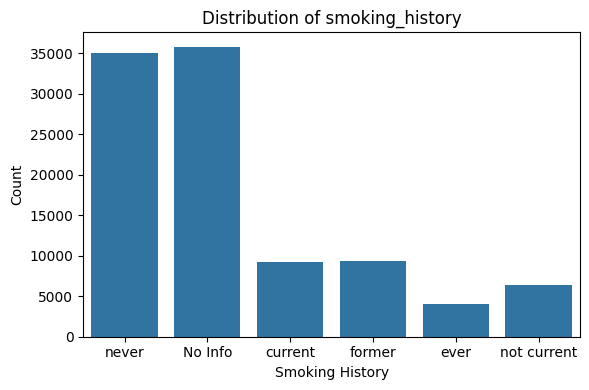

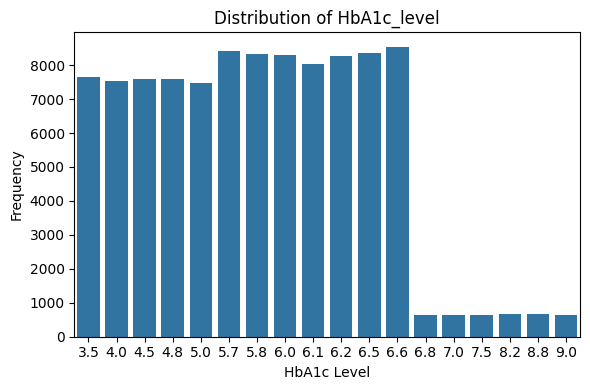

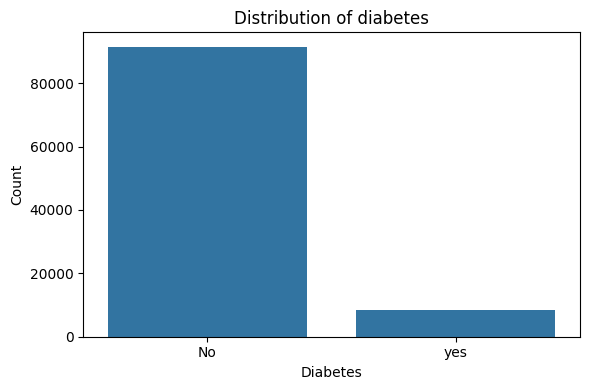

In [28]:
# 1 . gender
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=df)
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Age
plt.figure(figsize=(20,5))
sns.countplot(x='age', data=df)
plt.title('Sorted Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Hypertension
plt.figure(figsize=(6,4))
sns.countplot(x='hypertension', data=df)
plt.title('Distribution of Hypertension')
plt.xlabel('Hypertension')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

# 4. Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(x='heart_disease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.tight_layout()
plt.show()

# 5. Smoking History
plt.figure(figsize=(6,4))
sns.countplot(x='smoking_history',data=df)
plt.title('Distribution of smoking_history')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 6. HbA1c Level
plt.figure(figsize=(6,4))
sns.countplot(x='HbA1c_level',data=df)
plt.title('Distribution of HbA1c_level')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 7. Diabetes
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0,1],['No','yes'])
plt.tight_layout()
plt.show()

## <span style="color:red">Question 2</span>
### Plot four different histograms showing the combined distribution of the following two features: diabetes and gender, diabetes and hypertension, diabetes and heart disease, and finally diabetes and smoking history.

##### hint: use sns.countplot and use the parameter 'hue'

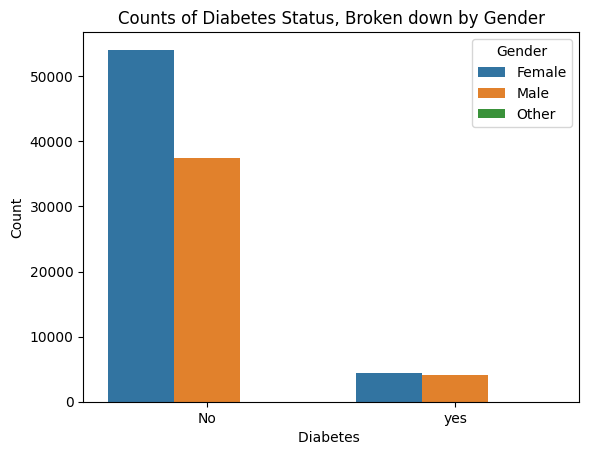

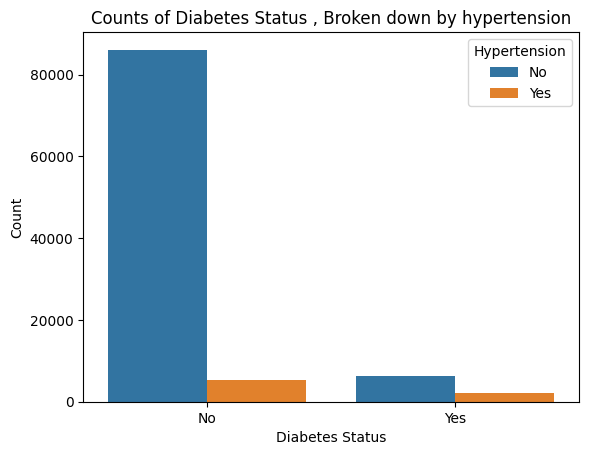

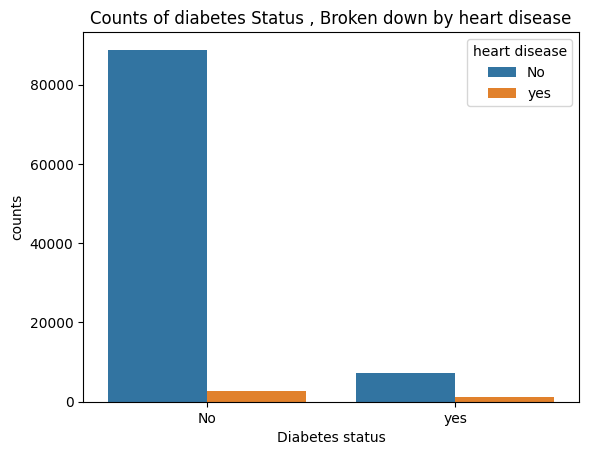

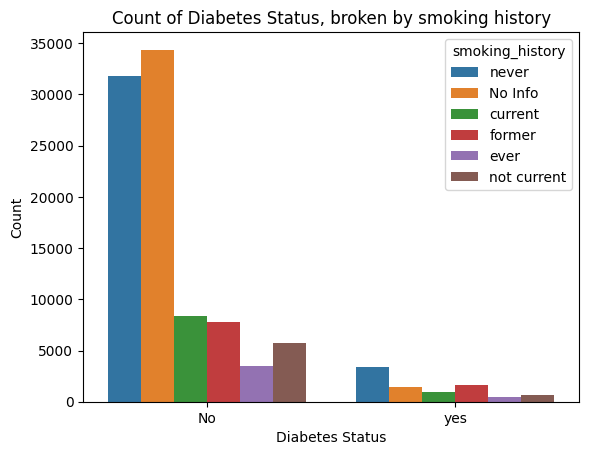

In [11]:
sns.countplot(x='diabetes', hue='gender', data=df)
plt.xticks(ticks=[0,1],labels=['No','yes'], ha='center')
plt.title('Counts of Diabetes Status, Broken down by Gender')
plt.xlabel('Diabetes ')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

sns.countplot(x='diabetes', hue='hypertension', data=df)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], ha='center')
plt.legend(title='Hypertension', labels=['No', 'Yes'])
plt.title('Counts of Diabetes Status , Broken down by hypertension')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

sns.countplot(x='diabetes' , hue='heart_disease', data=df)
plt.title('Counts of diabetes Status , Broken down by heart disease')
plt.xlabel('Diabetes status')
plt.ylabel('counts')
plt.xticks(ticks=[0,1] , labels=['No','yes'] , ha='center')
plt.legend(title='heart disease', labels=['No' , 'yes'])
plt.show()

sns.countplot(x='diabetes',hue='smoking_history',data=df)
plt.title('Count of Diabetes Status, broken by smoking history')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['No','yes'], ha='center')
plt.show()

#### From these visualizations, give a description of the distributions you see.

## <span style="color:red">Question 3.a</span>
### Now let's create a new feature named "initial\_diagnosis" which categorizes the patients based on their HbA1c\_level.

##### hint: Create an empty list. Then, loop over the elements of data['HbA1c_level']. Afterward, write if, elif, elif blocks to append the category to the empty list. Finally, write the resulting list as a new column in the dataframe (hint: data['column_name']=diagnosing_list)

In [29]:
# Initialize an empty list
initial_diagnosis = []

# Loop through HbA1c_level and categorize
for level in df['HbA1c_level']:
    if level < 5.7:
        diagnosis = 'Normal'
    elif 5.7 <= level < 6.5:
        diagnosis = 'Prediabetes'
    else:
        diagnosis = 'Diabetes'
    initial_diagnosis.append(diagnosis)  

# Add the new column to the DataFrame
df['initial_diagnosis'] = initial_diagnosis

# Verify the first 10 rows
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,initial_diagnosis
0,Female,80.0,0,1,never,25.19,6.6,140,0,Diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Diabetes
2,Male,28.0,0,0,never,27.32,5.7,158,0,Prediabetes
3,Female,36.0,0,0,current,23.45,5.0,155,0,Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,Normal
5,Female,20.0,0,0,never,27.32,6.6,85,0,Diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1,Diabetes
7,Female,79.0,0,0,No Info,23.86,5.7,85,0,Prediabetes
8,Male,42.0,0,0,never,33.64,4.8,145,0,Normal
9,Female,32.0,0,0,never,27.32,5.0,100,0,Normal


## <span style="color:red">Question 3.b</span>
### After you have added the initial\_diagnosis feature to the dataframe, plot three different histograms showing each of the initial\_diagnosis categories v.s. if the patient is diabetic or not.

##### hint: use sns.countplot with hue='diabetes'

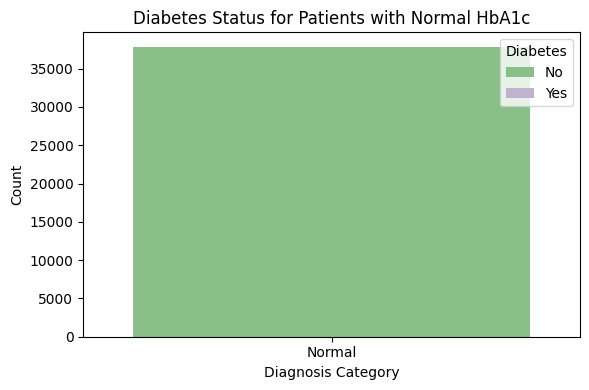

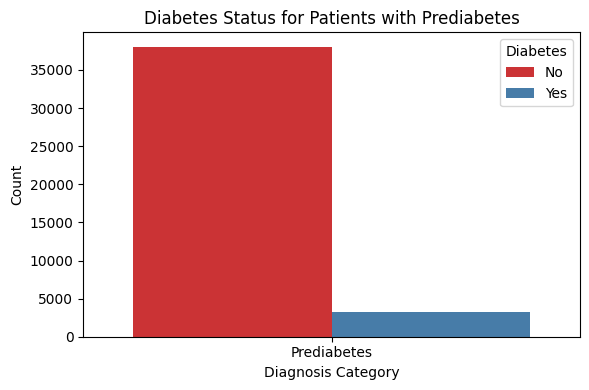

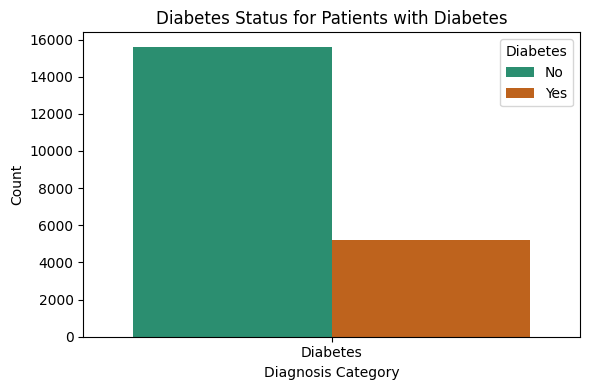

In [30]:
# 1) Plot for "Normal" diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='initial_diagnosis', hue='diabetes',data=df[df['initial_diagnosis'] == 'Normal'] ,palette='Accent',hue_order=[0, 1])
plt.title('Diabetes Status for Patients with Normal HbA1c')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# 2) Plot for "Prediabetes" diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='initial_diagnosis', hue='diabetes', data=df[df['initial_diagnosis'] == 'Prediabetes'], palette='Set1',hue_order=[0, 1])
plt.title('Diabetes Status for Patients with Prediabetes')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# 3) Plot for "Diabetes" diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='initial_diagnosis', hue='diabetes', data=df[df['initial_diagnosis'] == 'Diabetes'], palette='Dark2', hue_order=[0, 1])
plt.title('Diabetes Status for Patients with Diabetes')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

## <span style="color:red">Question 3.c</span>
### Drop the "initial\_diagnosis" column you created earlier.

##### hint: use drop() function

In [31]:
df.drop('initial_diagnosis', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## <span style="color:red">Question 4</span>
### Now let's do some pre-processing by encoding the categorical variables. Encode the gender and smoking\_history columns by applying the one-hot-encoding we learned this week.

##### hint: use pd.get_dummies

In [68]:
new_data=pd.get_dummies(df,columns=['gender', 'smoking_history'])
new_data.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


#### Following the head() display, discuss the change observed in the dataset

## <span style="color:red">Question 5</span>
### Check for duplicates in the dataset and print their sum.

In [71]:
duplicate_count=new_data.duplicated().sum()
print(f"The number of duplicate rows are: {duplicate_count}")

The number of duplicate rows are: 3854


## <span style="color:red">Question 6</span>
### If you found any duplicates, drop them.

In [72]:
clean_data=new_data.drop_duplicates()
print(clean_data.duplicated().sum())

0


## <span style="color:red">Question 7</span>
### Scale all the numeric features using the normalization technique.

##### hint: use MinMaxScaler()

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
mini_data = pd.DataFrame(scaler.fit_transform(clean_data), columns=clean_data.columns)

mini_data.head()




,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Discuss the changes observed after scaling is applied.

<div style="background-color: orange">
    <center> <h3> Part 2 </h3> </center>
    <center> <h3> Machine Learning </h3> </center>
</div>

## <span style="color:red">Question 1</span>
### Divide the dataset into 80\% training and 20\% testing

##### hint: use train_test_splot from sklearn.model_selection

In [74]:
X = mini_data.drop(['diabetes'], axis=1)
y = mini_data['diabetes']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

X_train.shape , y_train.shape, X_test.shape, y_test.shape

((76916, 15), (76916,), (19230, 15), (19230,))

## <span style="color:red">Question 2</span>
### Create a logistic regression model in one line using Sklearn then train the model on the training dataset

##### hint: use LogisticRegression() and the fit() function

In [40]:
from sklearn.linear_model import LogisticRegression
lr_diabetes=LogisticRegression().fit(X_train,y_train)
lr_diabetes

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## <span style="color:red">Question 3</span>
### Evaluate the performance of the model on the testing dataset by computing the accuracy

In [50]:
from sklearn.metrics import accuracy_score
y_pred=lr_diabetes.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Model: Logistic regression','\n' f'Accuracy : {round(accuracy,2)}')


Model: Logistic regression 
Accuracy : 0.96


## <span style="color:red">Question 4</span>
### Predict if the following patient is diabetic or no:
### Female, 48, 0, 1, 'current', 28.4, 6.2, 120

##### hint: make sure you do the necessary preprocessing before doing the prediction
##### You will face an issue encoding the given data similar to the training data. To train to do a workaround, append the new data on the old data and perform the same preprocessing again: one hot encoding and scaling. 
##### If you want to fo

In [65]:
def prep_pred_row(data_pred):
    data_pred = pd.DataFrame(data_pred)
    data_pred['diabetes'] = 0
    new_data = pd.concat([df, data_pred], ignore_index=True)
    data_pred_encoded = pd.get_dummies(new_data,columns=['gender', 'smoking_history'])
    data_pred_encoded = data_pred_encoded.reindex(columns=mini_data.columns, fill_value=0)
    data_test_scaled = pd.DataFrame(scaler.transform(data_pred_encoded),columns=data_pred_encoded.columns)
    row_to_predict = data_test_scaled.tail(1)
    row_to_predict = row_to_predict.drop('diabetes', axis=1)
    return row_to_predict

data_pred = {'gender':['Female'],'age':[48] , 'hypertension':[0] , 'heart_disease':[1], 'smoking_history':['current'],'bmi':[28.4],'HbA1c_level':[6.2],'blood_glucose_level':[120]}


row_to_predict = prep_pred_row(data_pred)
is_patient_diabetic = lr_diabetes.predict(row_to_predict)
print("The new patient's diabetes condition is", bool(is_patient_diabetic))


The new patient's diabetes condition is False


In [66]:
probs = lr_diabetes.predict_proba(row_to_predict)
print(f'P(non-diabetic): {probs[0,0]}')
print(f'P(diabetic):     {probs[0,1]}')

P(non-diabetic): 0.9526371664682496
P(diabetic):     0.047362833531750435
